In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from scipy import stats

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
engine.execute('SELECT max(date) FROM measurement').fetchall()

[('2017-08-23',)]

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
# To get an overall idea of the data display the total amount of dates in the data provided
session.query(func.count(Measurement.date)).all()

[(19550,)]

In [11]:
# Calculate the date one year from the last date in data set.
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"Last Date:{last_date[0]}")

Last Date:2017-08-23


In [12]:
latest_date = dt.datetime.strptime(last_date[0], '%Y-%m-%d')
query_date = latest_date + dt.timedelta(days=365)
print(f"A year later: {query_date}")

A year later: 2018-08-23 00:00:00


In [13]:
# Perform a query to retrieve the data and precipitation scores
precip_data = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= "2016-08-23").\
      filter(Measurement.date <= "2017-08-23").all()

In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
precip_df = pd.DataFrame(precip_data, columns=['Date','Precipitation Score'])
precip_df = precip_df.sort_values(by='Date')
precip_df = precip_df.set_index('Date')
precip_df = precip_df.dropna()
precip_df.head()

,Precipitation Score
Date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70


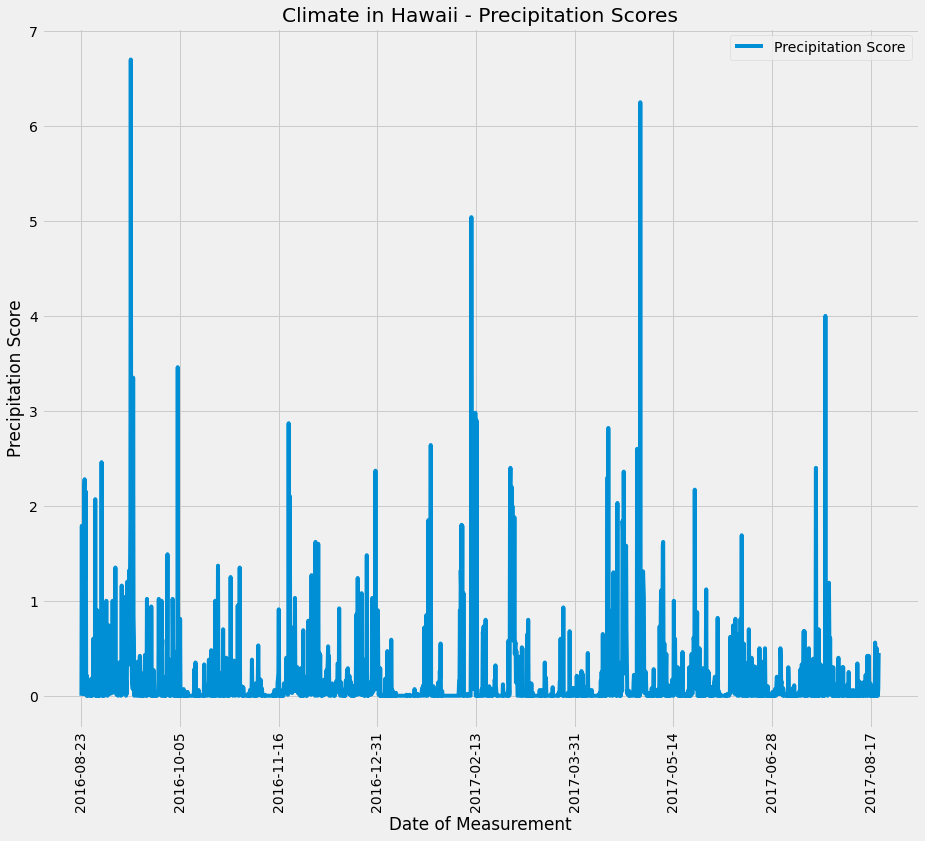

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
plot_1 = precip_df.plot(rot=90, title = "Climate in Hawaii - Precipitation Scores", 
                        xlabel='Date of Measurement',
                        ylabel='Precipitation Score',
                        figsize=(14,12))
plt.show()

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,Precipitation Score
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number stations in the dataset
num_station = session.query(Station.id).count()
print(f"The total number of stations present in this dataset is {num_station}")

The total number of stations present in this dataset is 9


In [18]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_act = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_act

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_id = 'USC00519281'
station_stats = session.query(func.min(Measurement.tobs),
                             func.max(Measurement.tobs),
                             func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
station_stats

[(54.0, 85.0, 71.66378066378067)]

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_data = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= '2016-08-24').all()

# put data into a df and plot the histogram
station_tobs = pd.DataFrame(station_data, columns=['tobs'])

<AxesSubplot:ylabel='Frequency'>

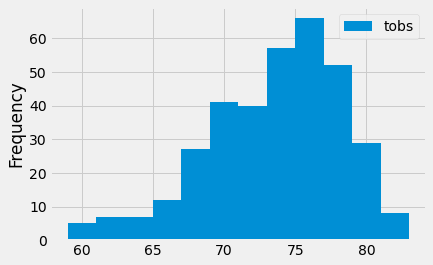

In [21]:
station_tobs.plot.hist(bins=12)

# Close session

In [22]:
# Close Session
session.close()

# Bonus: Temperature Analysis I

In [23]:
# "tobs" is "temperature observations"
df = pd.read_csv('hawaii_measurements.csv')
df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [24]:
# Convert the date column format from string to datetime
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   station  19550 non-null  object        
 1   date     19550 non-null  datetime64[ns]
 2   prcp     18103 non-null  float64       
 3   tobs     19550 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 611.1+ KB


In [25]:
# Set the date column as the DataFrame index
# Drop the date column
df.set_index('date', inplace=True)
df

,station,prcp,tobs
date,,,
2010-01-01,USC00519397,0.08,65
2010-01-02,USC00519397,0.00,63
2010-01-03,USC00519397,0.00,74
2010-01-04,USC00519397,0.00,76
2010-01-06,USC00519397,NaN,73
...,...,...,...
2017-08-19,USC00516128,0.09,71
2017-08-20,USC00516128,NaN,78
2017-08-21,USC00516128,0.56,76


### Compare June and December data across all years 

In [27]:
# Filter data for desired months
sel = [Measurement.date, Measurement.tobs]
june_temp = session.query(*sel).\
    filter(func.strftime('%m', Measurement.date) == '06').all()
dec_temp = session.query(*sel).\
    filter(func.strftime('%m', Measurement.date) == '12').all()

In [30]:
# Create collections of June temperature data
june_df = pd.DataFrame(june_temp, columns=['date', 'temperature'])
june_df.head()

,date,temperature
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0


In [34]:
# Identify the average temperature for June
june_avg = june_df["temperature"].mean()
print(f"The average temperature in the month of June is {june_avg}")

The average temperature in the month of June is 74.94411764705882


In [35]:
# Create collections of December temperature data
dec_df = pd.DataFrame(dec_temp, columns=['date', 'temperature'])
dec_df.head()

,date,temperature
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0


In [36]:
# Identify the average temperature for December
dec_avg = dec_df["temperature"].mean()
print(f"The average temperature in the month of June is {dec_avg}")

The average temperature in the month of June is 71.04152933421226


In [37]:
# Run paired t-test
# Null Hypothesis (0):There is no significant difference in the average temperatures in the of June and December
# Alternate Hypothesis (1): There is a significant difference in the average temperatures of June and December
stats.ttest_ind(june_df["temperature"], dec_df["temperature"])

Ttest_indResult(statistic=31.60372399000329, pvalue=3.9025129038616655e-191)

# Analysis

### From the t-test conducted we can esablish that there is a significant difference in the temperatures between the months of June and December. This is shown by p-value being small, hence, we can reject the null hypothesis proposed.